In [78]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [79]:
import yfinance as yf

In [80]:
data = yf.download(['AAPL', "FB", "MSFT", "AMZN", "^GSPC"],'2012-05-18','2019-12-31')["Adj Close"]

data.round(2).head(6)
#data.dtypes

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,FB,MSFT,^GSPC
Date,,,,,
2012-05-18,65.77,213.85,38.23,24.39,1295.22
2012-05-21,69.60,218.11,34.03,24.79,1315.99
2012-05-22,69.07,215.33,31.00,24.80,1316.63
2012-05-23,70.75,217.28,32.00,24.26,1318.86
2012-05-24,70.10,215.24,33.03,24.23,1320.68
2012-05-25,69.73,212.89,31.91,24.22,1317.82


In [130]:
data.info()
np.data["APPL"].min()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1917 entries, 2012-05-18 to 2019-12-31
Data columns (total 6 columns):
AAPL     1917 non-null float64
AMZN     1917 non-null float64
FB       1917 non-null float64
MSFT     1917 non-null float64
^GSPC    1917 non-null float64
RF       1917 non-null float64
dtypes: float64(6)
memory usage: 104.8 KB


AttributeError: module 'numpy' has no attribute 'data'

In [82]:
data.isna().sum()

AAPL     0
AMZN     0
FB       0
MSFT     0
^GSPC    0
dtype: int64

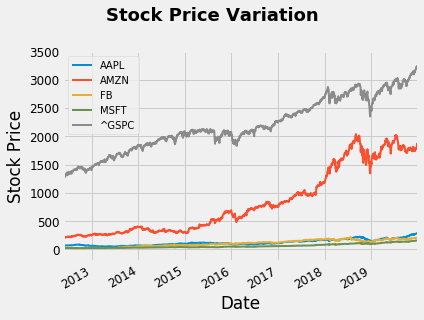

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import pandas as pd
with plt.style.context('fivethirtyeight'):
    ax=data.plot(linewidth =2)
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    
    plt.suptitle('Stock Price Variation', size=18, y=1.1,fontweight='bold');
    plt.ylim(-200,3500)
    plt.grid(True)
    plt.legend(loc=2, prop={'size': 10})
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig("Stock Price Variation", dpi = 150,bbox_inches ="tight")
plt.show()

In [84]:
rf= pd.read_csv("F-F_Research_Data_Factors_daily.csv", header=3, index_col=0)
rf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24644 entries, 19260701 to Copyright 2019 Kenneth R. French
Data columns (total 4 columns):
Mkt-RF    24643 non-null float64
SMB       24643 non-null float64
HML       24643 non-null float64
RF        24643 non-null float64
dtypes: float64(4)
memory usage: 962.7+ KB


In [85]:
rf = rf.loc["20120518":]

In [86]:
rf = rf[:-1]
rf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1917 entries, 20120518 to 20191231
Data columns (total 4 columns):
Mkt-RF    1917 non-null float64
SMB       1917 non-null float64
HML       1917 non-null float64
RF        1917 non-null float64
dtypes: float64(4)
memory usage: 74.9+ KB


In [87]:
rf.index = data.index

In [88]:
data["RF"] = rf["RF"]

In [89]:
data.FB[data.FB.isna() == False]
data.count()

AAPL     1917
AMZN     1917
FB       1917
MSFT     1917
^GSPC    1917
RF       1917
dtype: int64

In [90]:
data.head()

,AAPL,AMZN,FB,MSFT,^GSPC,RF
Date,,,,,,
2012-05-18,65.770210,213.850006,38.230000,24.394806,1295.219971,0.0
2012-05-21,69.601997,218.110001,34.029999,24.794863,1315.989990,0.0
2012-05-22,69.067520,215.330002,31.000000,24.803186,1316.630005,0.0
2012-05-23,70.752777,217.279999,32.000000,24.261457,1318.859985,0.0
2012-05-24,70.102989,215.240005,33.029999,24.228115,1320.680054,0.0


In [91]:
first_prices= data.iloc[0, :-1]

In [92]:
normalized = data.iloc[:,:-1].div(first_prices) * 100

In [93]:
# Total return for both stocks
print((normalized.iloc[-1] / normalized.iloc[0] -1)*100)

AAPL     345.421583
AMZN     764.082260
FB       436.882036
MSFT     544.688185
^GSPC    149.438713
dtype: float64


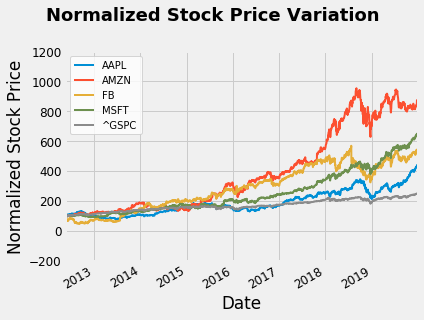

In [94]:
with plt.style.context('fivethirtyeight'):
    ax= normalized.plot(linewidth =2)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Date")
plt.ylabel("Normalized Stock Price")

plt.ylim(-200,1200)
plt.grid(True)
plt.legend(loc=2, prop={'size': 10})
plt.suptitle('Normalized Stock Price Variation', size=18, y=1.1,fontweight='bold');
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig("Normalized Stock Variation", dpi = 150,bbox_inches ="tight")
plt.show()

In [95]:
import numpy as np
import pandas as pd

In [96]:
normalized.corr()

,AAPL,AMZN,FB,MSFT,^GSPC
AAPL,1.000000,0.932422,0.899645,0.958338,0.947890
AMZN,0.932422,1.000000,0.906248,0.969482,0.936927
FB,0.899645,0.906248,1.000000,0.894073,0.960981
MSFT,0.958338,0.969482,0.894073,1.000000,0.946824
^GSPC,0.947890,0.936927,0.960981,0.946824,1.000000


In [97]:
import seaborn as sns

       AAPL  AMZN   FB  MSFT  ^GSPC   RF
AAPL    1.0  -0.4  0.3   0.8    0.7 -0.0
AMZN   -0.4   1.0  0.2   0.0   -0.1  0.1
FB      0.3   0.2  1.0   0.7    0.9 -0.5
MSFT    0.8   0.0  0.7   1.0    0.9 -0.5
^GSPC   0.7  -0.1  0.9   0.9    1.0 -0.5
RF     -0.0   0.1 -0.5  -0.5   -0.5  1.0


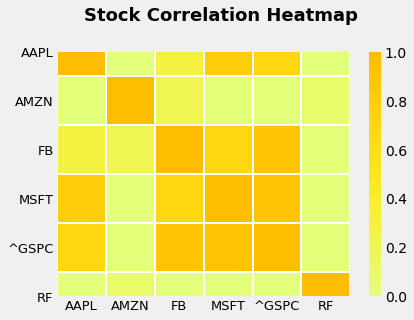

In [98]:
# Heatmap of returns
# Calculate year-end prices here
annual_prices = data.resample("A").last()

# Calculate annual returns here
correlations = round(annual_prices.pct_change().corr(),1)

# Calculate and print the correlation matrix here

print(correlations)

# Visualize the correlations as heatmap here

with plt.style.context('fivethirtyeight'):
    ax =sns.heatmap(correlations, annot = False, vmin =0, center =1, vmax =1, cmap = 'Wistia', linewidths = 1, square = True,annot_kws={"size": 10})

plt.suptitle('Stock Correlation Heatmap',size=18, y=1.1,fontweight='bold');

plt.xticks(size=13, rotation = "horizontal")
plt.yticks(size=13,rotation = "horizontal")

plt.savefig("Stock Correlation Heatmap", dpi = 100, bbox_inches ="tight")

plt.show()


In [99]:
#dailyreturns 
returns = data.iloc[:, :-1].pct_change().dropna()
beta=returns.cov() / returns.var()

In [100]:
#betas of companies (the last column)_ daily data without rf 
round(beta,2)

,AAPL,AMZN,FB,MSFT,^GSPC
AAPL,1.00,0.33,0.20,0.49,1.14
AMZN,0.43,1.00,0.32,0.65,1.32
FB,0.41,0.50,1.00,0.50,1.13
MSFT,0.40,0.40,0.20,1.00,1.23
^GSPC,0.30,0.26,0.14,0.39,1.00


In [101]:
#Add risk free rate to the "data" df
returns["RF"] = data.iloc[1:, 5]

In [102]:
#Add excess return
returns["Rm-Rf"] = returns["^GSPC"] - returns["RF"]    

In [103]:
#Determine dependent variables
exo = returns.columns[0:4]

In [104]:
returns.columns[7:]

Index([], dtype='object')

In [105]:
returns.columns

Index(['AAPL', 'AMZN', 'FB', 'MSFT', '^GSPC', 'RF', 'Rm-Rf'], dtype='object')

In [106]:
#Find the excess return for all stocks 
for i in range(0, len(returns.columns)-3):
    returns[returns.columns[i] + "_excess"] = returns.iloc[:, i] - returns.RF

In [107]:
import statsmodels.api as sm

In [108]:
#Determine the independent variable
endo= returns["Rm-Rf"]

In [109]:
exo= returns[returns.columns[7:]]

In [110]:
endo = sm.add_constant(endo)

C:\Users\Mick\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [111]:
CAPM_intercept = []
CAPM_beta= []
CAPM_pvalues_intercept = []
CAPM_pvalues_beta = []
for var in exo.columns:
    CAPM_intercept.append(sm.OLS(exo[var], endo).fit().params[0])
    CAPM_beta.append(sm.OLS(exo[var], endo).fit().params[1])
    CAPM_pvalues_intercept.append(sm.OLS(exo[var], endo).fit().pvalues[0])
    CAPM_pvalues_beta.append(sm.OLS(exo[var], endo).fit().pvalues[1])

In [112]:
#del CAPM_params
#del CAPM_pvalues

In [113]:
CAPM_beta

[1.1038323995805803, 1.277243536583954, 1.1218702203719468, 1.1812926391622494]

In [114]:
exo.columns

Index(['AAPL_excess', 'AMZN_excess', 'FB_excess', 'MSFT_excess'], dtype='object')

In [115]:
intercept = [*zip(CAPM_intercept, CAPM_pvalues_intercept)]

In [116]:
intercept_results = [*zip(exo.columns, intercept)]

In [117]:
beta = [*zip(CAPM_beta, CAPM_pvalues_beta)]

In [118]:
beta_results = [*zip(exo.columns, beta)]

In [119]:
intercept_results

[('AAPL_excess', (0.0006127362886227249, 0.044816664088125964)),
 ('AMZN_excess', (0.0013593096657508418, 0.00011218476867571907)),
 ('FB_excess', (0.0008761559026515028, 0.07381420399314163)),
 ('MSFT_excess', (0.0009425203620799453, 0.00011772331897297481))]

In [120]:
beta_results

[('AAPL_excess', (1.1038323995805803, 7.352993775916826e-187)),
 ('AMZN_excess', (1.277243536583954, 1.5934206406582698e-188)),
 ('FB_excess', (1.1218702203719468, 3.400822032174937e-86)),
 ('MSFT_excess', (1.1812926391622494, 2.1621123814548646e-290))]

In [121]:
returns[returns.columns[1]]

Date
2012-05-21    0.019920
2012-05-22   -0.012746
2012-05-23    0.009056
2012-05-24   -0.009389
2012-05-25   -0.010918
                ...   
2019-12-24   -0.002114
2019-12-26    0.044467
2019-12-27    0.000551
2019-12-30   -0.012253
2019-12-31    0.000514
Name: AMZN, Length: 1916, dtype: float64

In [122]:
#Find the excess return over SP500 for all stocks 
for i in range(0, len(returns.columns[:4])):
               returns[returns.columns[i] + "_benchmark"] = returns.iloc[:, i] - returns["^GSPC"]
               

In [123]:
annualized_ex_Ret=round(returns[returns.columns[-4:]].mean()*36500,2)

In [124]:
annualized_ex_Ret

AAPL_benchmark    14.50
AMZN_benchmark    28.60
FB_benchmark      22.74
MSFT_benchmark    20.66
dtype: float64

In [125]:
#Find IR for all stocks

annualized_std_Dev=round(returns[returns.columns[-4:]].std()*100*365**0.5,2)
annualized_ex_Ret/annualized_std_Dev

AAPL_benchmark    0.582329
AMZN_benchmark    0.987910
FB_benchmark      0.569782
MSFT_benchmark    1.027350
dtype: float64

In [126]:
returns.groupby(returns.index.month_name()).mean()


,AAPL,AMZN,FB,MSFT,^GSPC,RF,Rm-Rf,AAPL_excess,AMZN_excess,FB_excess,MSFT_excess,AAPL_benchmark,AMZN_benchmark,FB_benchmark,MSFT_benchmark
Date,,,,,,,,,,,,,,,
April,0.000058,0.002206,0.002557,0.002701,0.000612,0.002836,-0.002223,-0.002778,-0.000630,-0.000278,-0.000135,-0.000555,0.001593,0.001945,0.002089
August,0.002763,0.000708,-0.000269,0.001379,-0.000124,0.002416,-0.002539,0.000347,-0.001708,-0.002685,-0.001036,0.002886,0.000832,-0.000145,0.001503
December,-0.001523,-0.000815,0.000324,-0.000043,-0.000147,0.002759,-0.002907,-0.004282,-0.003574,-0.002435,-0.002802,-0.001376,-0.000667,0.000471,0.000105
February,0.002805,0.000425,-0.000477,0.000984,0.001005,0.002701,-0.001697,0.000103,-0.002276,-0.003178,-0.001718,0.001800,-0.000580,-0.001482,-0.000021
January,-0.001097,0.003054,0.005646,0.000609,0.000587,0.002483,-0.001896,-0.003580,0.000572,0.003163,-0.001873,-0.001684,0.002467,0.005059,0.000023
July,0.002391,0.002435,0.002234,0.001391,0.001005,0.002741,-0.001736,-0.000350,-0.000306,-0.000507,-0.001350,0.001387,0.001431,0.001230,0.000386
June,-0.000615,0.001403,0.001755,0.000233,0.000619,0.002331,-0.001713,-0.002946,-0.000929,-0.000576,-0.002098,-0.001234,0.000784,0.001137,-0.000386
March,0.001358,0.000581,-0.000619,0.001135,0.000556,0.002400,-0.001844,-0.001042,-0.001819,-0.003019,-0.001265,0.000802,0.000025,-0.001175,0.000579
May,0.002372,0.001486,-0.001563,0.001008,0.000298,0.002639,-0.002341,-0.000267,-0.001153,-0.004202,-0.001631,0.002074,0.001188,-0.001861,0.000710


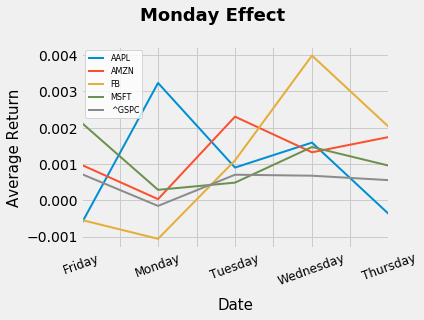

In [128]:
#Optional: The avg return based on DoW
#Monday anomaly is it true?

meanReturn_byday= returns[returns.columns[:5]].groupby(returns.index.day_name()).mean()
meanReturn_byday = meanReturn_byday.reindex([ "Friday", "Monday", "Tuesday", "Wednesday", "Thursday"])
with plt.style.context('fivethirtyeight'):
    ax = meanReturn_byday.plot(linewidth =2)
#plt.title("Average Return (DoW Based)")

ax.tick_params(axis='x', which='major', labelsize=12)
plt.suptitle('Monday Effect', size=18, y=1.1,fontweight='bold');
#plt.xticks([],[])
plt.xlabel("Date", size =15, labelpad =10)
plt.ylabel("Average Return", size =15)
#plt.legend(fontsize=8)
plt.grid(True)
plt.legend(loc=2, prop={'size': 8})

plt.xticks(rotation=20)
plt.savefig("Monday Effect", dpi = 150,bbox_inches ="tight")
plt.show()



In [ ]:
#Optional: The avg return based on months
meanReturn_bymonth= returns[returns.columns[:5]].groupby(returns.index.month).mean()
with plt.style.context('fivethirtyeight'):
    ax =meanReturn_bymonth.plot(linewidth =2)
ax.tick_params(axis='both', which='major', labelsize=12)
#plt.title("Average Monthly Return variation")
plt.suptitle('Average Monthly Return variation', size=18, y=1.1,fontweight='bold');

plt.xlabel("Month", size =15)
plt.ylabel("Average Return", size =15)
plt.legend(fontsize=8)
plt.grid(True)

plt.savefig("Average Monthly Return Variation", dpi = 150,bbox_inches ="tight")
plt.show()

In [ ]:
#When to buy Moving Average short(20) vs. MA long(100) for AMZN
data["APPL"] = data.AAPL.iloc[:-1]

In [ ]:
aa = data.AAPL.rolling(42).mean()

In [ ]:
bb = data.AAPL.rolling(252).mean()

In [ ]:
apple = pd.concat([aa, bb, data.AAPL], axis=1)

In [ ]:
apple.columns = ["MA42", "MA252", "Close"]

In [ ]:
#apple.head(1)

In [ ]:
# Plot moving averages for APPL stock
with plt.style.context('fivethirtyeight'):
    ax =apple[["MA42", "MA252"]].dropna().plot(linewidth =2)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.suptitle('Apple Moving Average', size=18, y=1.1,fontweight='bold');
plt.xlabel("Time", size =15)
plt.ylabel("Moving Average", size =15)
plt.grid(True)
plt.savefig("Moving Average Apple", dpi = 150,bbox_inches ="tight")
plt.show()

In [ ]:
#apple.Close.plot()
#plt.show()

In [ ]:
#Trading strategy based on MA(42) and MA(252)
apple["MA42-MA252"] = apple.MA42 - apple.MA252


In [ ]:
apple["MA42-MA252"].describe()

In [ ]:
Threshold = 0

apple["signal"] = np.where(apple["MA42-MA252"]> Threshold, 1, 0)


In [ ]:
apple["signal"] = np.where(apple["MA42-MA252"]< -Threshold, -1, apple.signal)

In [ ]:
apple["MA42-MA252"].tail()

In [ ]:
apple.signal.value_counts()

In [ ]:
#signals of buy and sell
#extracted from the book "python for finance" 
#apple.signal.plot()
#plt.show()

In [ ]:
#returns of apple and our trading strategy
# extracted from the book "python for finance" 

apple["Market"] = np.log(apple.Close / apple.Close.shift(1))
apple["Strategy"] = apple.signal.shift(1) * apple["Market"] 


In [ ]:
with plt.style.context('fivethirtyeight'):
    ax=apple[["Market", "Strategy"]].cumsum().apply(np.exp).plot(linewidth =2)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.suptitle("Apple's Actual Stock vs Trading Strategy", size=18, y=1.1,fontweight='bold');
plt.xlabel("Time", size =15)
plt.ylabel("Stock price", size  =15)
plt.grid(True)
plt.savefig("Apple Actual Stock vs Trading Strategy ", dpi = 150,bbox_inches ="tight")
plt.show()